In [1]:
import sys
sys.path.append('/storage/vbutoi/projects')
sys.path.append('/storage/vbutoi/libraries')
sys.path.append('/storage/vbutoi/projects/ESE')
sys.path.append('/storage/vbutoi/projects/UniverSeg')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("talk")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage/vbutoi/datasets',
))

# Results loader object does everything
from ionpy.analysis import ResultsLoader
from pathlib import Path
root = Path("/storage/vbutoi/scratch/ESE")
rs = ResultsLoader()

# For using code without restarting.
%load_ext autoreload
%autoreload 2
# For using yaml configs.
%load_ext yamlmagic

In [2]:
%%yaml results_cfg 

log:
    root: /storage/vbutoi/scratch/ESE/inference
    inference_groups: 
        - "04_24_24_UniverSeg_Inference"
    
calibration:
    metric_cfg_file: "/storage/vbutoi/projects/ESE/ese/experiment/configs/inference/Calibration_Metrics.yaml"

options:
    add_dice_loss_rows: True
    drop_nan_metric_rows: True 
    remove_shared_columns: False
    equal_rows_per_cfg_assert: False 

<IPython.core.display.Javascript object>

In [3]:
from ese.experiment.analysis.analyze_inf import load_cal_inference_stats

image_info_df = load_cal_inference_stats(
    results_cfg=results_cfg,
    load_cached=False,
)

/storage/vbutoi/libraries/pylot/pandas/register.py:47: UserWarning: registration of accessor <class 'pylot.pandas.register.register_series_method.<locals>.inner.<locals>.AccessorMethod'> under name 'fillNA' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  register_series_accessor(method.__name__)(AccessorMethod)
/storage/vbutoi/libraries/pylot/pandas/register.py:47: UserWarning: registration of accessor <class 'pylot.pandas.register.register_series_method.<locals>.inner.<locals>.AccessorMethod'> under name 'isNA' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  register_series_accessor(method.__name__)(AccessorMethod)
/storage/vbutoi/libraries/pylot/pandas/register.py:47: UserWarning: registration of accessor <class 'pylot.pandas.register.register_series_method.<locals>.inner.<locals>.AccessorMethod'> under name 'notNA' for type <class 'pandas.core.series.Series'> is overridi

Dropping (datapoint, metric) pairs with NaN metric score. Dropped from 7800 -> 7800 rows.
/storage/vbutoi/scratch/ESE/inference/04_22_24_ACDC_UniverSeg/ACDC_Ensemble_Uncalibrated                              20240422_100615-8DG5-3542df16b00e1f036ee4d7a7aa50188e     540
                                                                                                                      20240422_100619-NFJJ-86eff51584bf008368ad31f50fc6c8fd     900
                                                                                                                      20240422_100623-AQRJ-3a2458bb951c4cad4230880a1e7b2b3d    1020
/storage/vbutoi/scratch/ESE/inference/04_22_24_PanDental_Jaw_UniverSeg/PanDental_Jaw_Ensemble_Uncalibrated            20240422_101642-I1XX-94ac385d2b05750ee5eaf7c8d35c5153    1200
/storage/vbutoi/scratch/ESE/inference/04_22_24_PanDental_Mandible_UniverSeg/PanDental_Mandible_Ensemble_Uncalibrated  20240422_101600-JY7O-a743f643782a4481c54f8ff2cfefba3a    1320
/storage/v

In [4]:
image_info_df.keys()

Index(['support_idx', 'data_id', 'split', 'slice_idx', 'image_metric',
       'metric_score', 'groupavg_image_metric', 'groupavg_metric_score',
       'num_lab_0_pixels', 'num_lab_1_pixels', 'ECE', 'Edge-ECE', 'CW-ECE',
       'ECW-ECE', 'Uniform-CW-ECE', 'Uniform-ECW-ECE', 'log_set',
       'calibrator._class', 'calibrator._name', 'calibrator.normalize',
       'data.input_type', 'data.label', 'data.preload', 'data.resolution',
       'data.slicing', 'data.splits', 'data.support_size', 'data.task',
       'dataloader.batch_size', 'dataloader.num_workers',
       'dataloader.pin_memory', 'dataset._class', 'dataset.label',
       'dataset.min_label_density', 'dataset.preload', 'dataset.resolution',
       'dataset.return_data_id', 'dataset.samples_per_epoch',
       'dataset.slicing', 'dataset.support_size', 'dataset.task',
       'dataset.version', 'ensemble.combine_fn', 'ensemble.combine_quantity',
       'ensemble.normalize', 'ensemble.num_members', 'experiment.dataset_name',
       

In [5]:
def task(dataset_name, label):
    return f"{dataset_name}_{label}"

image_info_df.augment(task)

In [6]:
image_info_df['task'].unique()

array(['ACDC_2', 'ACDC_1', 'ACDC_0', 'PanDental_Jaw_0',
       'PanDental_Mandible_0', 'SpineWeb_0', 'STARE_0', 'WBC_1', 'WBC_0'],
      dtype=object)

In [7]:
image_info_df['task'] = image_info_df['task'].astype('category')
image_info_df['task'] = image_info_df['task'].cat.reorder_categories([
    'PanDental_Jaw_0',
    'PanDental_Mandible_0',
    'SpineWeb_0',
    'STARE_0',
    'WBC_1',
    'WBC_0',
    'ACDC_2',
    'ACDC_1',
    'ACDC_0'
])


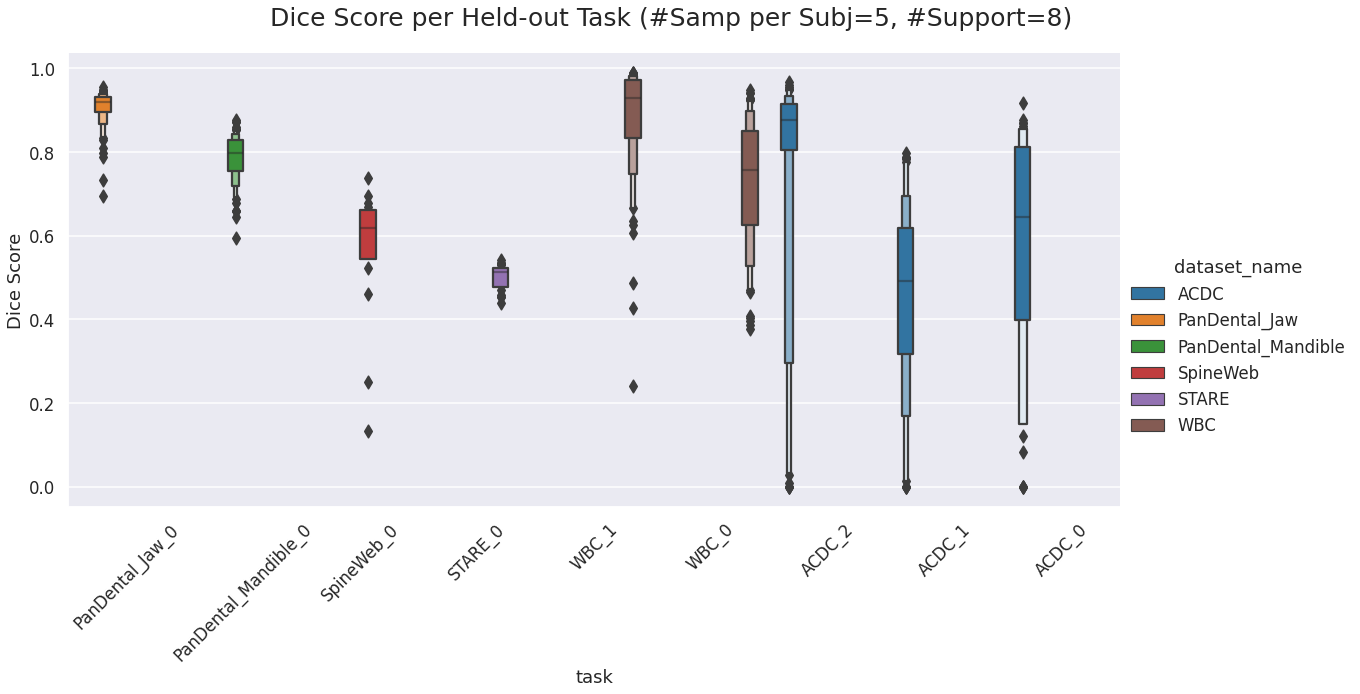

In [8]:
# Set the figsize
g = sns.catplot(
    data=image_info_df[image_info_df['image_metric'] == 'Dice'],
    x='task',
    y='metric_score',
    kind='boxen',
    hue='dataset_name',
    aspect=2,
    height=8,
)
# Set the y axis label to be Dice Score
g.set_xticklabels(rotation=45)
g.set(ylabel="Dice Score")

g.fig.suptitle("Dice Score per Held-out Task (#Samp per Subj=5, #Support=8)", fontsize=25)
g.fig.subplots_adjust(top=0.9)
# Give the title a bit of space from the plot


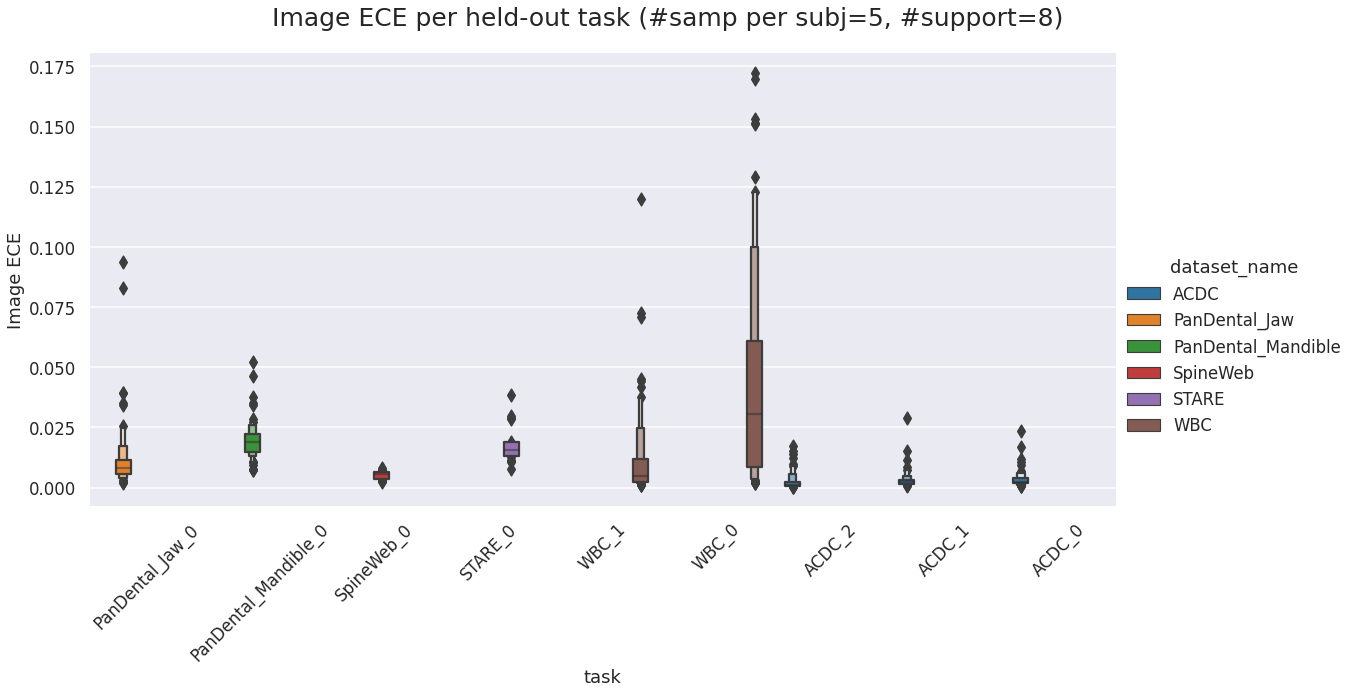

In [9]:
# set the figsize
g = sns.catplot(
    data=image_info_df[image_info_df['image_metric'] == 'Image_ECE'],
    x='task',
    y='metric_score',
    kind='boxen',
    hue='dataset_name',
    aspect=2,
    height=8,
)
# set the y axis label to be dice score
g.set_xticklabels(rotation=45)
g.set(ylabel="Image ECE")

g.fig.suptitle("Image ECE per held-out task (#samp per subj=5, #support=8)", fontsize=25)
g.fig.subplots_adjust(top=0.9)
# give the title a bit of space from the plot


In [10]:
# We want to compare how Dice relates to ECE, this means we need to pivot our dataframe
df_pivot = image_info_df.pivot(index=['data_id', 'support_idx', 'task', 'dataset_name'], columns='image_metric', values='metric_score').reset_index()

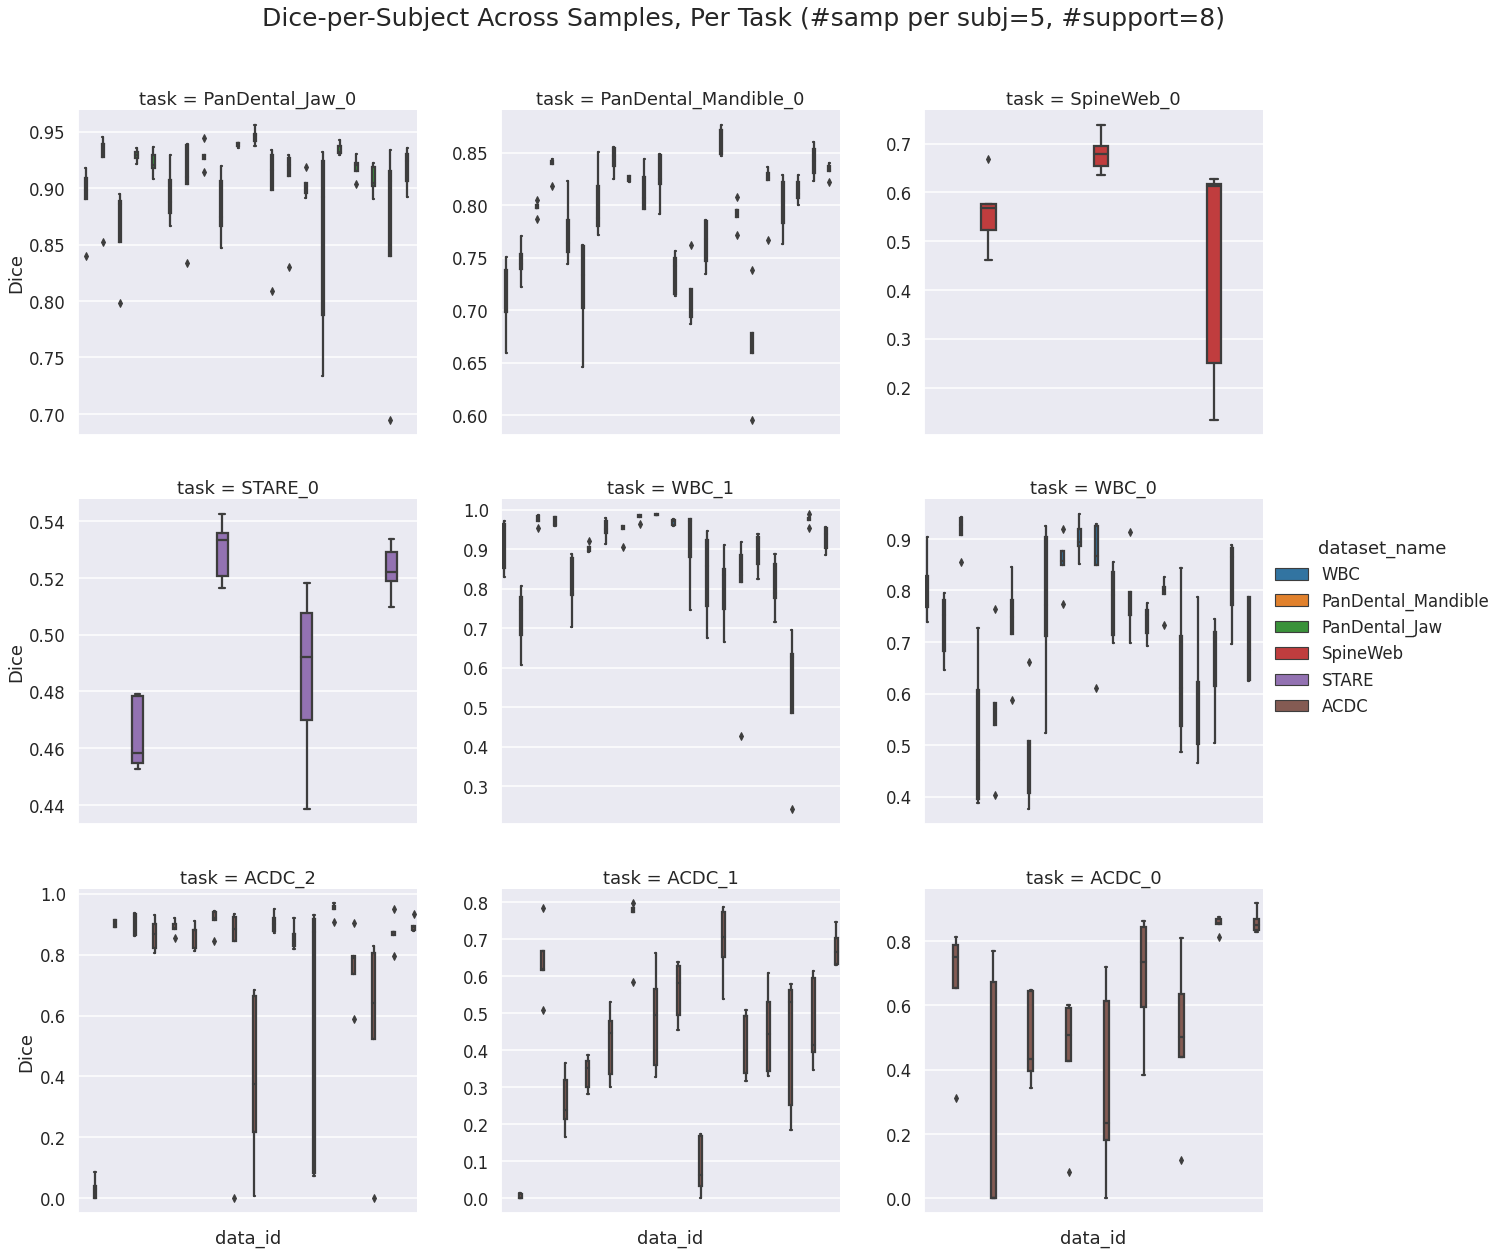

In [11]:
# set the figsize
g = sns.catplot(
    data=df_pivot,
    x='data_id',
    y='Dice',
    hue='dataset_name',
    col="task",
    col_wrap=3,
    height=6,
    kind='box',
    sharex=False,
    sharey=False
)
# set the y axis label to be dice score
g.fig.subplots_adjust(wspace=0.25, hspace=0.2)

g.fig.suptitle("Dice-per-Subject Across Samples, Per Task (#samp per subj=5, #support=8)", fontsize=25)
g.fig.subplots_adjust(top=0.9)
# Drop the x tick labels
for ax in g.axes.flatten():
    ax.set_xticklabels([])

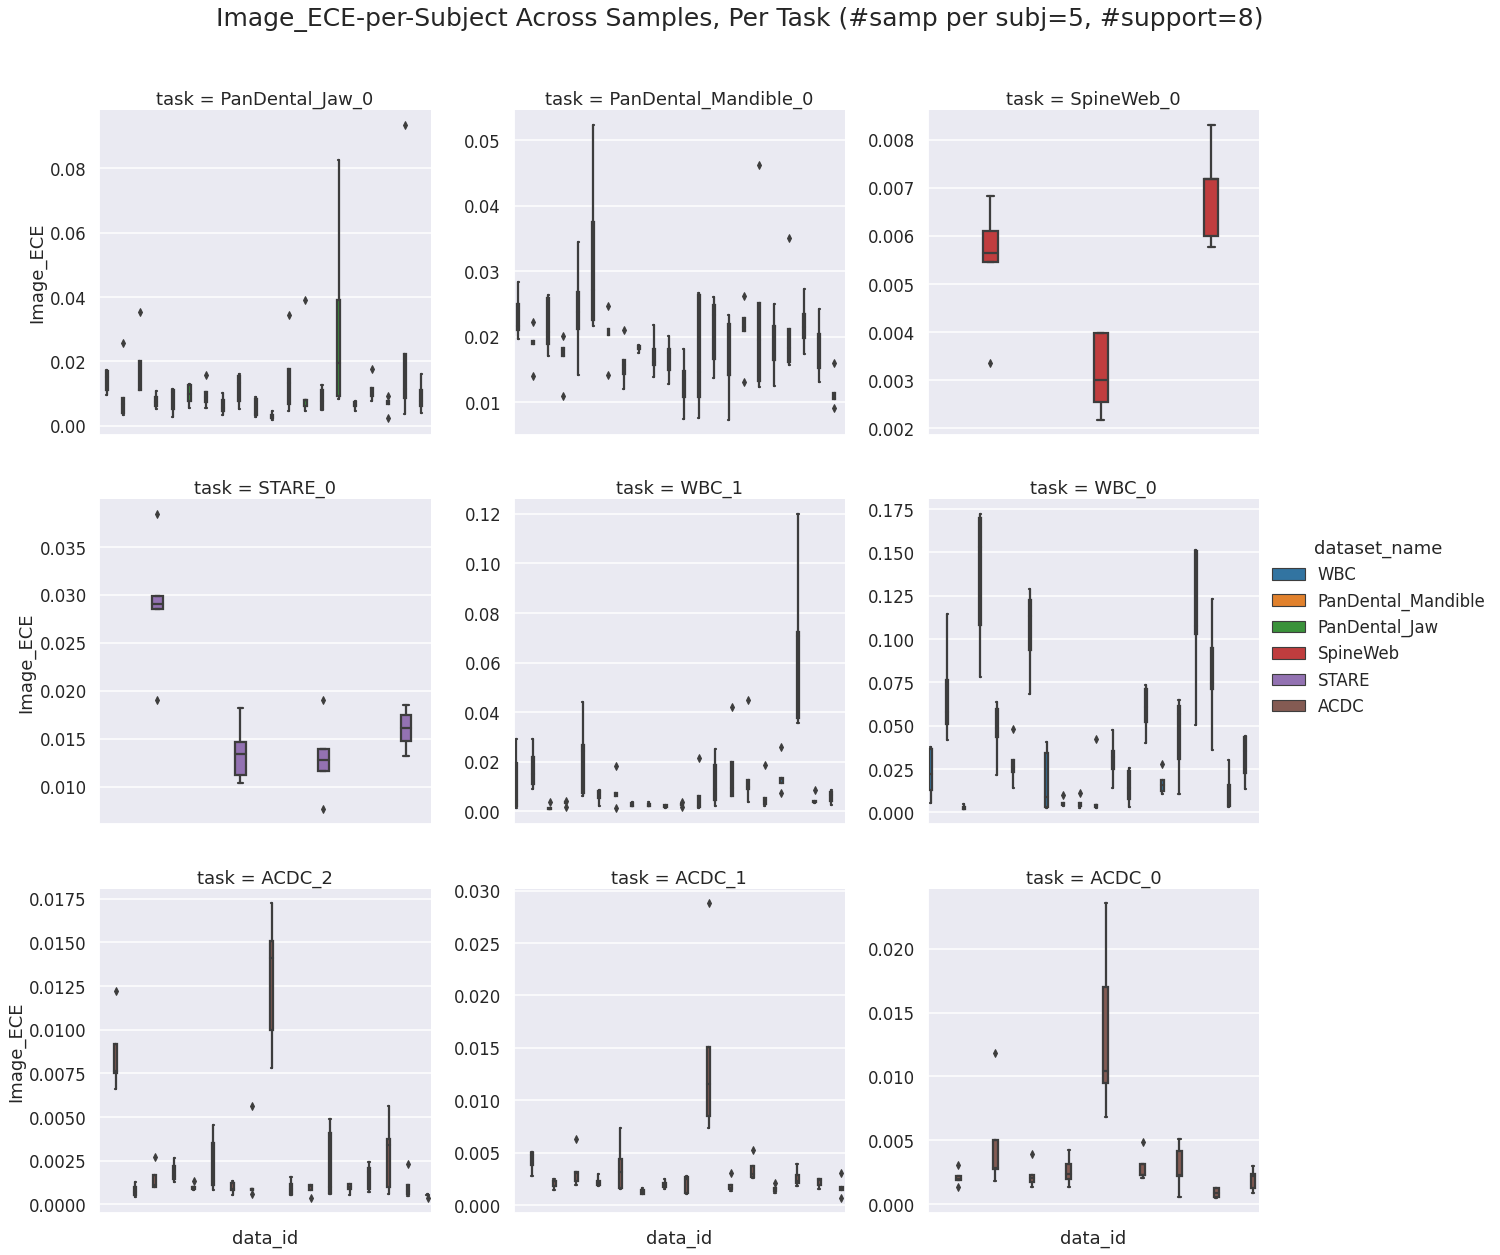

In [12]:
# set the figsize
g = sns.catplot(
    data=df_pivot,
    x='data_id',
    y='Image_ECE',
    hue='dataset_name',
    col="task",
    col_wrap=3,
    height=6,
    kind='box',
    sharex=False,
    sharey=False
)
# set the y axis label to be dice score
g.fig.subplots_adjust(wspace=0.25, hspace=0.2)

g.fig.suptitle("Image_ECE-per-Subject Across Samples, Per Task (#samp per subj=5, #support=8)", fontsize=25)
g.fig.subplots_adjust(top=0.9)
# Drop the x tick labels
for ax in g.axes.flatten():
    ax.set_xticklabels([])

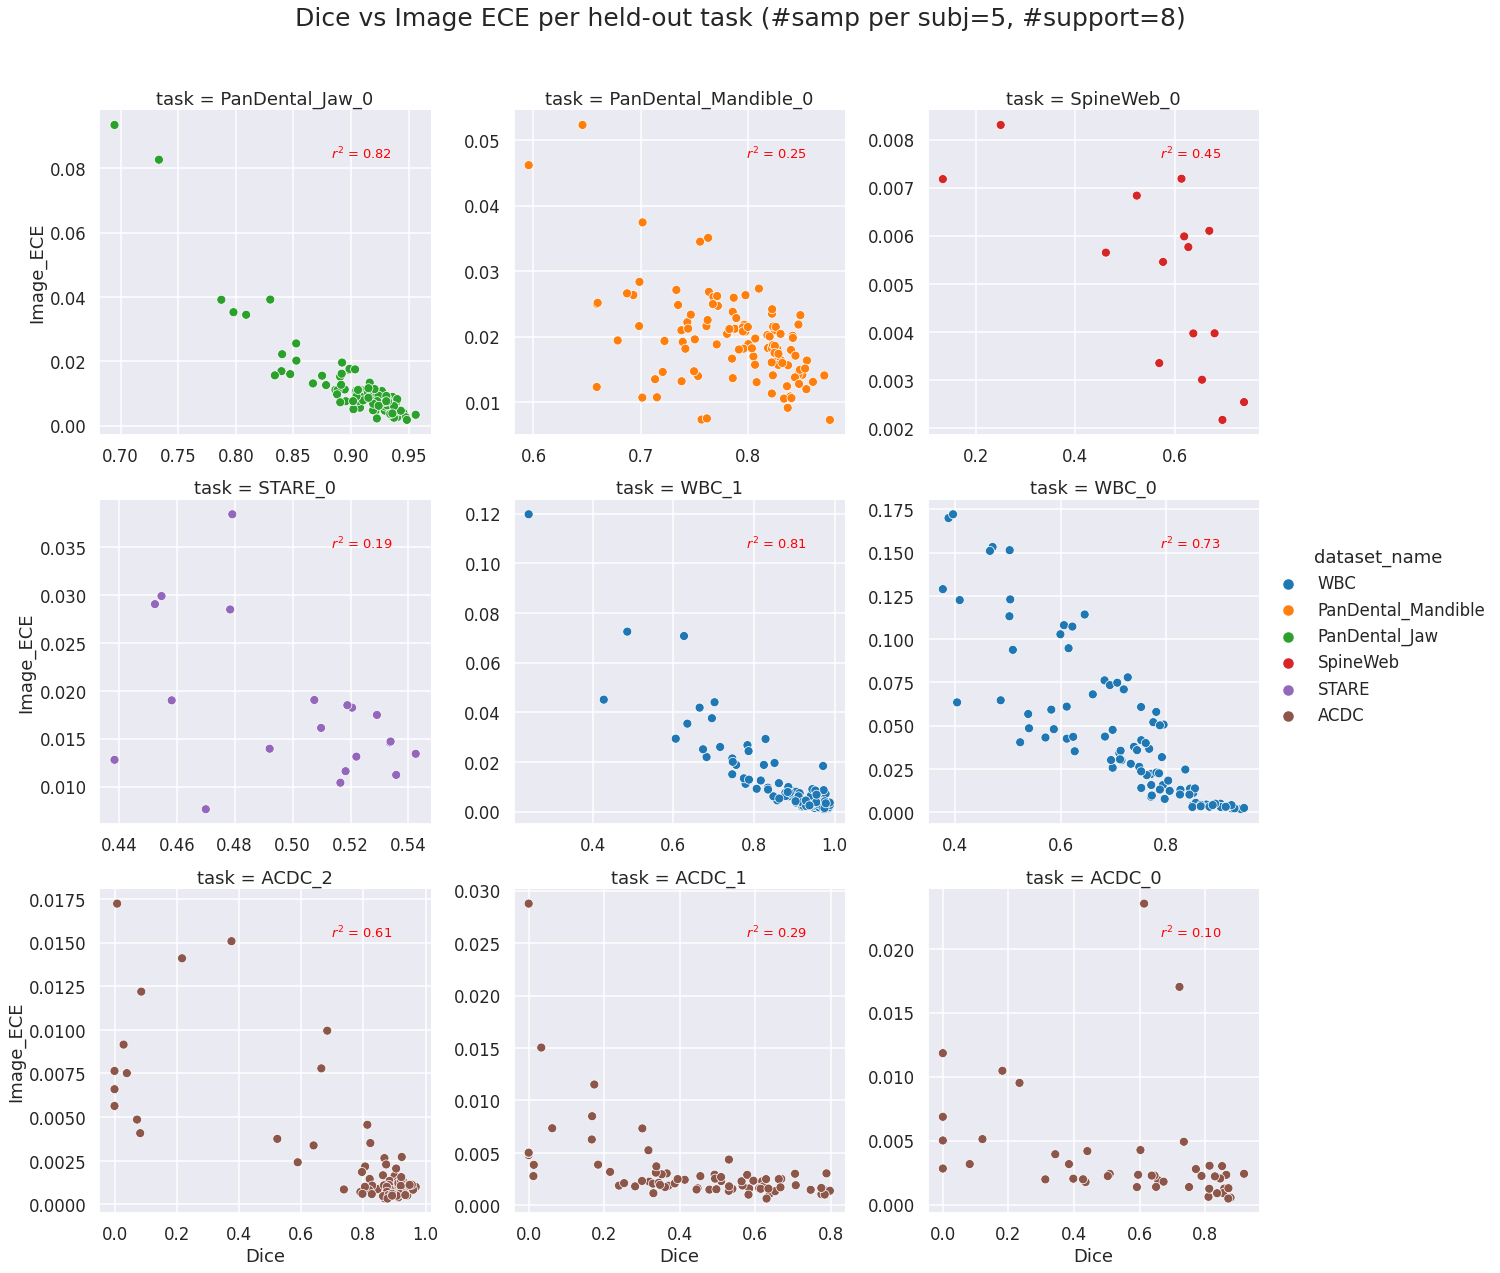

In [18]:
from scipy.stats import pearsonr

# Function to calculate r^2 value
def calculate_r_squared(x, y):
    correlation_matrix = pearsonr(x, y)
    r_squared = correlation_matrix[0] ** 2
    return r_squared

# set the figsize
g = sns.relplot(
    data=df_pivot,
    x='Dice',
    y='Image_ECE',
    kind='scatter',
    hue='dataset_name',
    col="task",
    col_wrap=3,
    height=6,
    facet_kws={
        "sharex":False,
        "sharey":False
    }
)
# set the y axis label to be dice score
g.fig.subplots_adjust(wspace=0.25, hspace=0.2)

g.fig.suptitle("Dice vs Image ECE per held-out task (#samp per subj=5, #support=8)", fontsize=25)
g.fig.subplots_adjust(top=0.9)

# Calculate and annotate r^2 value on each subplot
for ax in g.axes.flatten():
    x_data = ax.collections[0].get_offsets()[:, 0]
    y_data = ax.collections[0].get_offsets()[:, 1]
    r_squared = calculate_r_squared(x_data, y_data)
    ax.annotate(f"$r^2$ = {r_squared:.2f}", xy=(0.7, 0.85), xycoords='axes fraction', color='red', fontsize=13)

plt.show()